# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things. 

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new. 

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#use this cell to import additional libraries or define helper functions

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [11]:
df_raw = pd.read_csv("household_power_consumption.txt", sep= ";")

C:\Users\user\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [13]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [14]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [ ]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [ ]:
#create your Datetime column
df['Datetime']= pd.to_datetime(df['Date']+' '+df['Time'])
print(df.head())
print(df.types)

In [ ]:
#convert all data columns to numeric types
df['Global_active_power'] = df['Global_active_power'].apply(pd.to_numeric, errors='coerce')
df['Global_reactive_power'] = df['Global_reactive_power'].apply(pd.to_numeric, errors='coerce')
df['Voltage'] = df['Voltage'].apply(pd.to_numeric, errors='coerce')
df['Global_intensity'] = df['Global_intensity'].apply(pd.to_numeric, errors='coerce')
df['Sub_metering_1'] = df['Sub_metering_1'].apply(pd.to_numeric, errors='coerce')
df['Sub_metering_2'] = df['Sub_metering_2'].apply(pd.to_numeric, errors='coerce')

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [ ]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [21]:
df.dtypes

Date                             object
Time                             object
Global_active_power              object
Global_reactive_power            object
Voltage                          object
Global_intensity                 object
Sub_metering_1                   object
Sub_metering_2                   object
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [23]:
df.Date[0]

datetime.date(2006, 12, 16)

In [ ]:
df.Time[0]

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [30]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Sub_metering_3,Datetime
count,2049280.0000,2075259
mean,6.4584,2008-12-07 15:35:26.755847680
min,0.0000,2006-12-16 17:24:00
25%,0.0000,2007-12-12 00:18:30
50%,1.0000,2008-12-06 07:13:00
75%,17.0000,2009-12-01 14:07:30
max,31.0000,2010-12-11 23:59:00
std,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

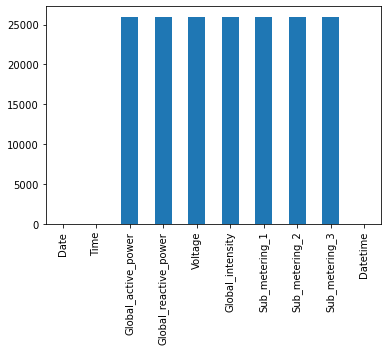

In [35]:
df.isna().sum().plot.bar()
plt.show()

<AxesSubplot:xlabel='Date'>

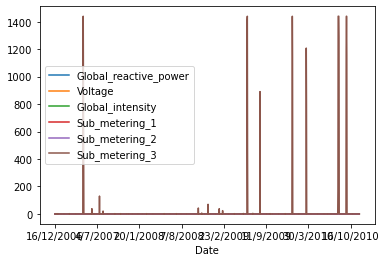

In [29]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot('Date', df_na.columns[3:-1])

**Q: What do you notice about the pattern of missing data?**

A: I saw that it could impact the reliability of your analysis and the inferences you made from it. Finding trends or patterns in the missing data that might need additional research can be done with the aid of visualization. Depending on the study, you might take into account several approaches to addressing missing data, including imputation, deletion, or modeling the mechanism directly. In conclusion, assessing and handling missing data is a crucial phase in data analysis and calls for careful thought and planning.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: The approach used to deal with missing data, in my opinion, depends on a number of variables, including the nature and cause of the missingness, the type of analysis being done, and the size and complexity of the dataset. A Model-based approaches: In this approach, the mechanism for missing data is directly modeled, either as a distinct analysis or as a component of the main analysis. It can be helpful when the missing data is connected to other dataset variables and the process for the missing data is complicated or unclear. It might, however, involve more complex computations and specialist knowledge. To compare and validate the results and lessen the restrictions, a combination of several methodologies can be helpful.

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [ ]:
#clean up missing data here

In [44]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
print(desc)

      Global_active_power Global_reactive_power       Voltage  \
count        2049280.0000          2049280.0000  2049280.0000   
mean               1.0916                0.1237      240.8399   
min                0.0760                0.0000      223.2000   
25%                0.3080                0.0480      238.9900   
50%                0.6020                0.1000      241.0100   
75%                1.5280                0.1940      242.8900   
max               11.1220                1.3900      254.1500   
std                1.0573                0.1127        3.2400   

      Global_intensity Sub_metering_1 Sub_metering_2 Sub_metering_3  \
count     2049280.0000   2049280.0000   2049280.0000   2049280.0000   
mean            4.6278         1.1219         1.2985         6.4584   
min             0.2000         0.0000         0.0000         0.0000   
25%             1.4000         0.0000         0.0000         0.0000   
50%             2.6000         0.0000         0.0000       

## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: I was decided to chart the following four variables across time:

Global active power - This variable shows how much energy the entire household uses each minute. It is interesting to examine how the power consumption changes over time, and whether there are any patterns or trends in the data.

Global reactive power - This variable shows how much reactive energy the entire household uses each minute. Reactive power is not used by the average household; it is used to keep the voltage in the electrical grid constant. Finding patterns or trends in the data and observing how reactive power changes over time are interesting.

Voltage: The voltage level of the home's electrical supply is represented by this variable. Seeing how the voltage level changes over time and looking for patterns or trends in the data is interesting.

Sub metering 1 - This variable shows how much energy the kitchen actively uses each minute. Seeing how the energy use in the kitchen changes over time and looking for patterns or trends in the data is interesting.

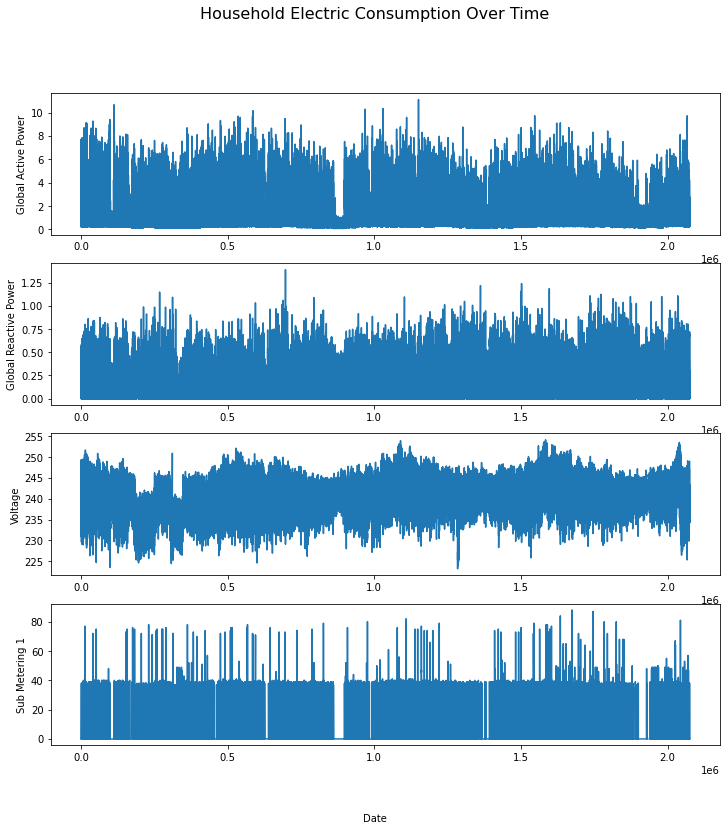

In [45]:
#build your line chart here
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
df['Global_active_power'].plot(ax=axes[0])
axes[0].set_ylabel('Global Active Power')
df['Global_reactive_power'].plot(ax=axes[1])
axes[1].set_ylabel('Global Reactive Power')
df['Voltage'].plot(ax=axes[2])
axes[2].set_ylabel('Voltage')
df['Sub_metering_1'].plot(ax=axes[3])
axes[3].set_ylabel('Sub Metering 1')

# Set common x-axis label and title
fig.text(0.5, 0.04, 'Date', ha='center', va='center')
fig.suptitle('Household Electric Consumption Over Time', fontsize=16)

# Display the plot
plt.show()

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A:When the raw data is visualized, there is a lot of noise and fluctuation, which makes it challenging to spot any distinct patterns or trends. It is challenging to determine from the raw plot whether the variations in the data are caused by daily or weekly cycles of energy use. There aren't many important insights or inferences to be gleaned from this layout.
The plot is also challenging to read and understand due to the abundance of data points, which makes it challenging to detect any patterns or trends. It could be necessary to aggregate the data across longer time periods (for example, hourly or daily averages) or apply more advanced techniques in order to make the plot easier to read and to emphasize any potential patterns or trends and data visualazation techniques

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).** 

In [46]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
monthly_averages = df.groupby(pd.Grouper(key='Datetime', freq='M')).mean()

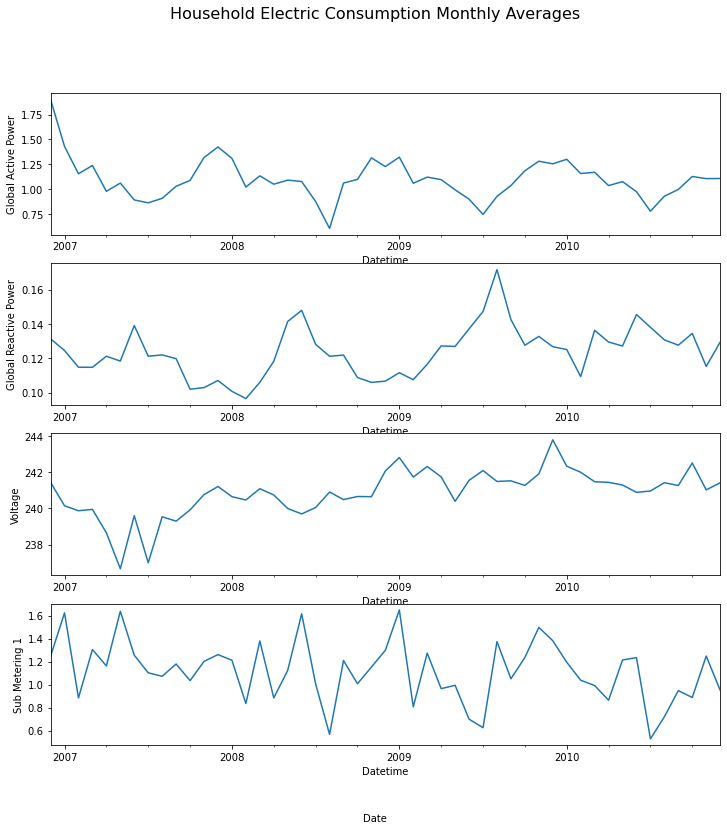

In [47]:
#build your linechart here
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
monthly_averages['Global_active_power'].plot(ax=axes[0])
axes[0].set_ylabel('Global Active Power')
monthly_averages['Global_reactive_power'].plot(ax=axes[1])
axes[1].set_ylabel('Global Reactive Power')
monthly_averages['Voltage'].plot(ax=axes[2])
axes[2].set_ylabel('Voltage')
monthly_averages['Sub_metering_1'].plot(ax=axes[3])
axes[3].set_ylabel('Sub Metering 1')

# Set common x-axis label and title
fig.text(0.5, 0.04, 'Date', ha='center', va='center')
fig.suptitle('Household Electric Consumption Monthly Averages', fontsize=16)

# Display the plot
plt.show()

**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: As we examine the monthly statistics, we can observe that the global active power, global reactive power, and sub metering 1 appear to follow a similar pattern, with usage peaks occurring in the winter and usage declines in the summer. The voltage, on the other hand, exhibits a level that is more constant over the course of the year.

Additionally, there appears to be a general downward trend in power consumption over time, which may be brought on by alterations in home habits, the development of energy-efficient appliances, or other elements. Generally speaking, the monthly data offers a more in-depth look at the trends in power consumption over time and can be used to spot trends and potential hot spots for energy saving.

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [48]:
#compute your moving average here
rolling_averages = df.rolling(window=30).mean()

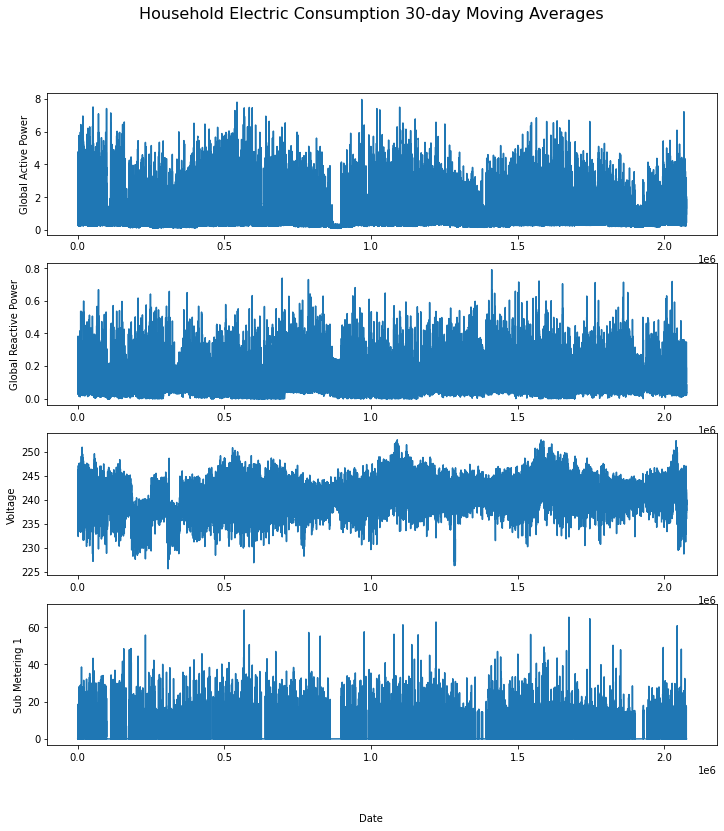

In [49]:
#build your line chart on the moving average here
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
rolling_averages['Global_active_power'].plot(ax=axes[0])
axes[0].set_ylabel('Global Active Power')
rolling_averages['Global_reactive_power'].plot(ax=axes[1])
axes[1].set_ylabel('Global Reactive Power')
rolling_averages['Voltage'].plot(ax=axes[2])
axes[2].set_ylabel('Voltage')
rolling_averages['Sub_metering_1'].plot(ax=axes[3])
axes[3].set_ylabel('Sub Metering 1')

# Set common x-axis label and title
fig.text(0.5, 0.04, 'Date', ha='center', va='center')
fig.suptitle('Household Electric Consumption 30-day Moving Averages', fontsize=16)

# Display the plot
plt.show()


**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: Although both the moving average and the monthly average are valuable for visualizing the data, they offer distinct kinds of insights. The monthly average offers a high-level summary of the data, enabling us to compare usage trends between years and displaying how each variable evolves over the course of each month. It is especially helpful for spotting seasonal trends and recurring patterns.
The moving average, on the other hand, offers a more in-depth view of the data by minimizing short-term swings and emphasizing longer-term patterns. It is also helpful for detecting changes in usage patterns over time and for spotting trends that may have been hidden by noise in the original data.

Depending on the precise insights we are seeking to derive from the data, both the monthly average and moving average might be useful ways to visualize the data. In general, the moving average is probably more useful for recognizing long-term trends and changes in the data, but the monthly average is probably more useful for finding seasonal patterns and cycles in the data.

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

In [ ]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
    
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A:Here I should get the scatter matrix plot and correlation coefficients show a substantial positive association between the variables Global active power, Global intensity, and Voltage. but I couldn't found out the reason why it is not showing the results only here

But I want to explan the things what exactly can happen After the above patterns and correlations This makes sense given that they are all indicators of the household's overall power use. Moreover, Global active power and Global reactive power have a lesser positive connection, which suggests they may be measuring different but related aspects of home energy use. Anomaly identification and predictive modeling are two downstream tasks that may be impacted by these patterns and relationships. Due to their significant correlations, we might wish to take into account including all three of these variables as predictors if we are developing a predictive model to anticipate future electricity usage, for instance.

However, since Global active power is the variable that is most strongly connected, while the other variables have lesser correlations, if we are looking for odd patterns in power consumption, we may want to concentrate on it. Making wise decisions regarding the tasks that will come afterward requires a grasp of the patterns and correlations in the data.